# Exploration of dataset

### Install needed dependency

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Helper functions

In [3]:
def make_histogram(df: pd.DataFrame, variable: str, binwidth: int, lower_limit: int = None, upper_limit: int = None) -> None:
    if upper_limit is None:
        upper_limit = df[variable].max()

    if lower_limit is None:
        lower_limit = df[variable].min()

    bins = np.arange(lower_limit, upper_limit + binwidth, binwidth)

    plt.hist(df[variable], bins=bins, edgecolor='black',
             alpha=0.75, range=[df[variable].min(), upper_limit])

    plt.ylabel("Count")
    plt.xlabel(variable.title)


def make_scatter_plot(df: pd.DataFrame, paramOne: str, paramTwo: str, logx: bool = False, logy: bool = False):
    plt.plot(df[paramOne], df[paramTwo], '*', alpha=0.1)
    if logx:
        plt.xscale("log")
    if logy:
        plt.yscale('log')
    plt.xlabel(paramOne)
    plt.ylabel(paramTwo)


def corr_heatmap(df: pd.DataFrame, figsize=(10, 10)):
    _, axs = plt.subplots(figsize=figsize)
    ax = sns.heatmap(
        df.corr(), vmin=-1, vmax=1, cmap="BrBG", linewidths=0.5, annot=True, ax=axs)
    ax.set_title('Correlation matrix')
    return ax


def min_max_normalize(data: pd.DataFrame) -> pd.DataFrame:
    normalize_df = (data - data.min()) / (data.max() - data.min())
    return normalize_df


## Import dataset

I am also dropping passengerId, because its the same as rownumber / but not zero-indexed.

In [4]:
dataframe = pd.read_csv('Titanic.csv')
# Dropping Passenger ID because its the same as rowkey - but indexed from 1.
dataframe.drop('PassengerId', axis=1, inplace=True)

## Explore Data

In [5]:
dataframe.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataframe.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
dataframe.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Anova test on Survived, sex, fare, age 
Because Age has missing data, the ANOVA test will print nan,
to fix this, one will need to fill the missing data in the rows.

Some of the methods used to fill missing values is mean, median and mode.
This kind of methods to fill missings values is very good when the values are distributed normally.

Looking at the age distribution, I feel like median is a good choise for us.

When doing the ANOVA test, the lower the p_value the more significant difference there are to atleast two of the columns.

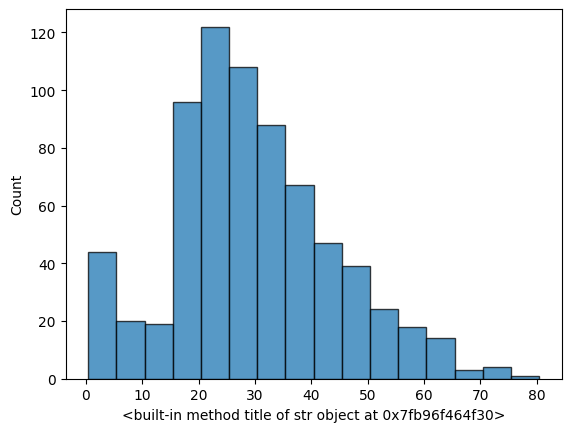

In [9]:
make_histogram(dataframe, variable='Age', binwidth=5)

In [27]:
dataframe['Age'] = dataframe['Age'].fillna(dataframe['Age'].median())

In [35]:
selected_columns = dataframe[['Survived', 'Age', 'Fare']]
f_val, p_val = stats.f_oneway(*selected_columns.to_numpy().T)

print('F-Value:{0:.5f}'.format(f_val))
print('P-Value:{0:.16f}'.format(p_val))

F-Value:314.02684
P-Value:0.0000000000000000


### More missing values

Some other methods used to fill values is taking random values from the dataset and fill inn. But int the case of cabin, theres alot of unique values, and alot of missing data, so this would not be a good idea.

One way to fix this is to fill in the missing data with one value, this will preserve the rows missing data, and still show that the values represent a distinct category of data.

Comming to embarked, since the missing values are only 2, I'll fill them with the value of most occurrance.

In [43]:
dataframe['Cabin'] = dataframe['Cabin'].fillna('Unknown')
dataframe['Embarked'] = dataframe['Cabin'].fillna(method='ffill')
dataframe.isna().sum()

Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin              0
Embarked           0
Family             0
Traveling_Alone    0
dtype: int64

### Whats next?

To do further analysis of the data, it could be a good idea to encode the data.

There are diffrent methods for doing so, OneHotEncoding - which is good if you have 


<AxesSubplot: >

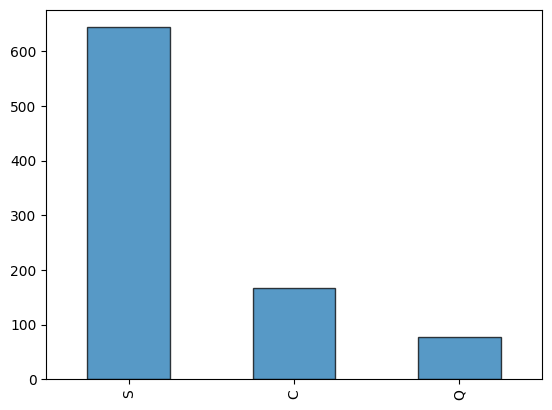

In [11]:
dataframe['Embarked'].value_counts().plot(kind='bar', alpha=.75, edgecolor='black')

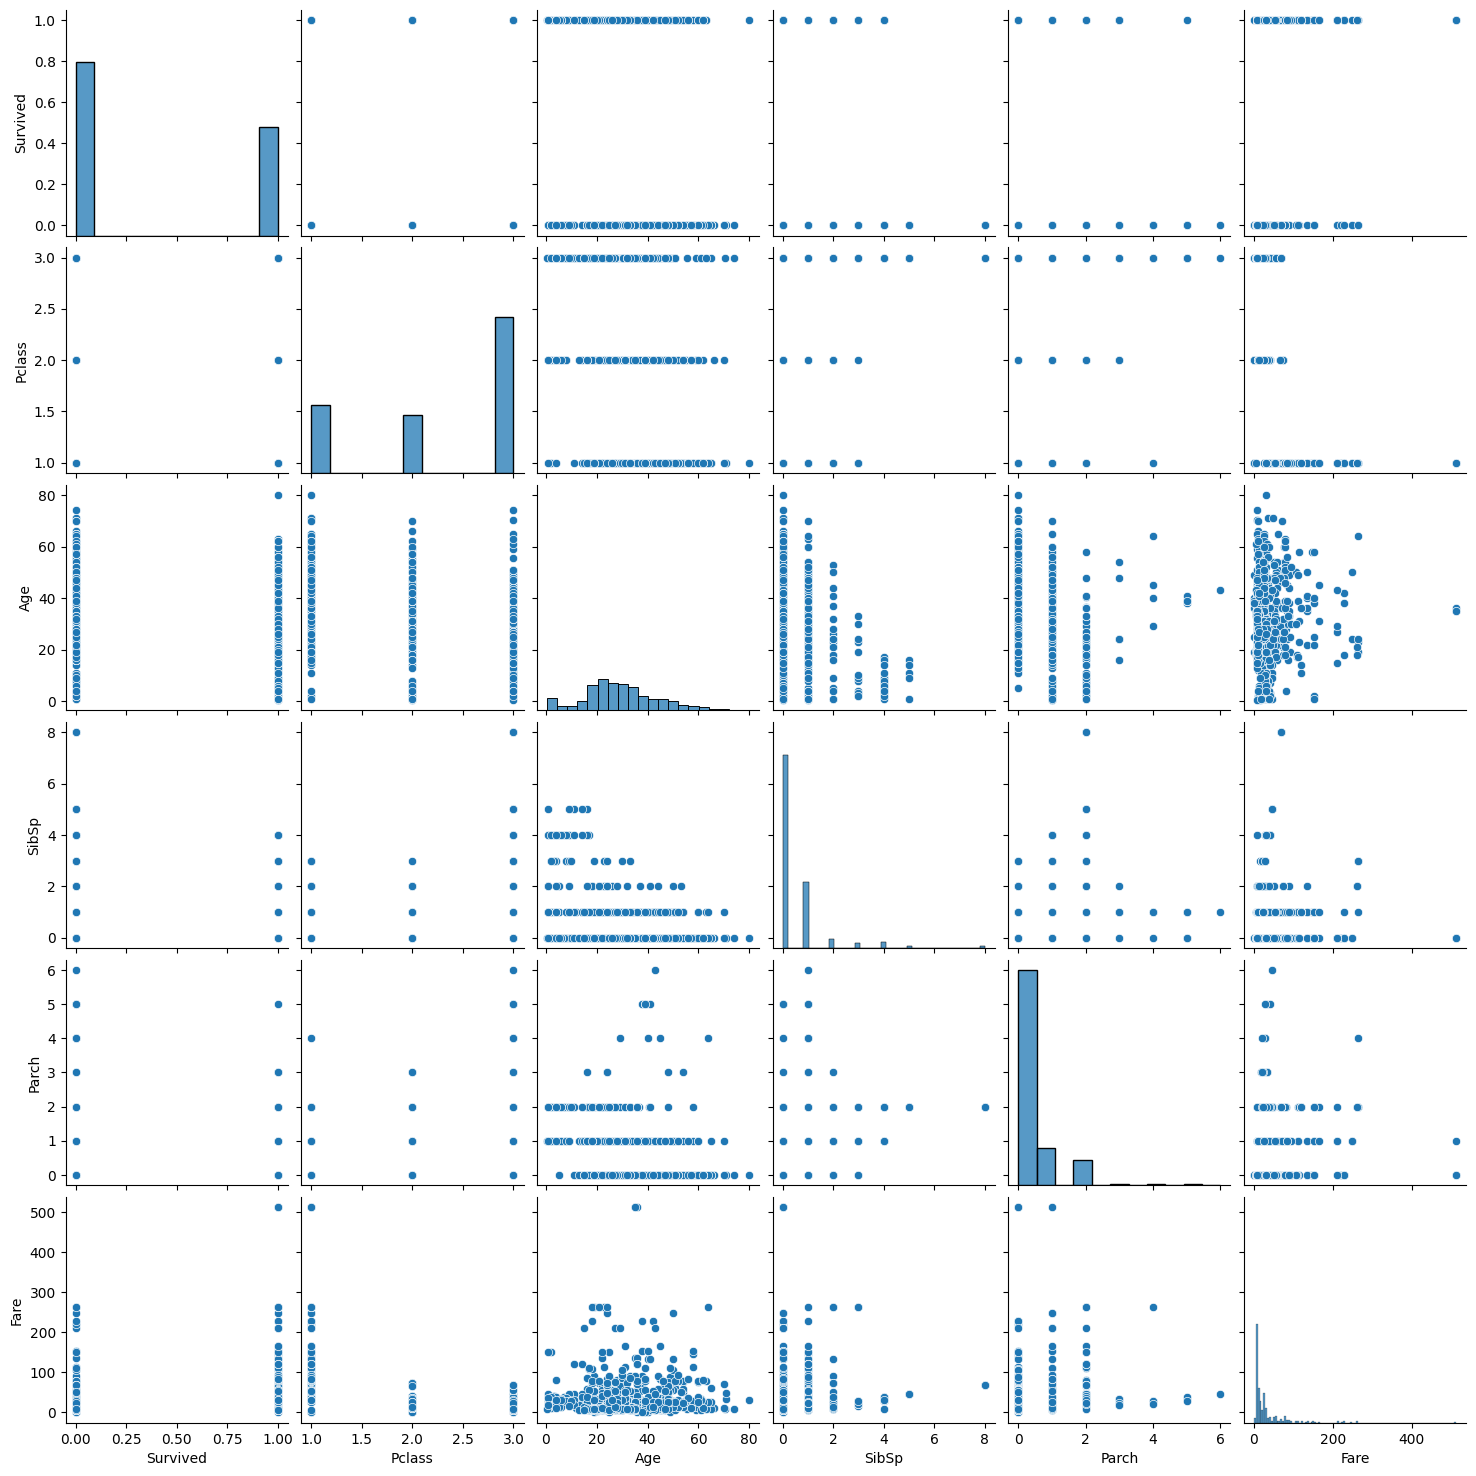

In [12]:
sns.pairplot(dataframe)

<AxesSubplot: >

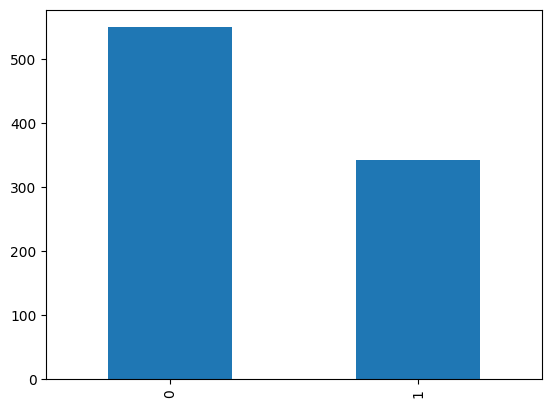

In [13]:
dataframe['Survived'].value_counts().plot(kind='bar')

In [15]:
dataframe['Family'] = dataframe['Parch'] + dataframe['SibSp']
dataframe['Traveling_Alone'] = dataframe['Family'] == 0

### Splitting Survived into two datasets, and doing analyzis on the data

In [16]:
survived_df = dataframe[dataframe['Survived'] == 1]
did_not_survive_df = dataframe[dataframe['Survived'] == 0]

In [17]:
survived_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408,0.938596
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998,1.186076
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000,0.000000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000,1.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000,2.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200,6.000000


In [18]:
did_not_survive_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,549.0,549.000000,424.000000,549.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.626179,0.553734,0.329690,22.117887,0.883424
std,0.0,0.735805,14.172110,1.288399,0.823166,31.388207,1.830669
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,21.000000,0.000000,0.000000,7.854200,0.000000
50%,0.0,3.000000,28.000000,0.000000,0.000000,10.500000,0.000000
75%,0.0,3.000000,39.000000,1.000000,0.000000,26.000000,1.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000,10.000000


#### What does this data show us?

To my surprice, there were alot more people that died in Titanic than survived. This is mind blowing.

But going deeper into the numbers, 